# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate correlations between features
- Extract relevant insights to determine steps for feature engineering

In [24]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os 
from collections import Counter

# Manually add path to read from another folder 
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

In [34]:
df = pl.read_csv("../data/cleaned_google_analytics.csv",ignore_errors=True)

In [35]:
df.head()

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
str,i64,i64,str,str,str,str,str,str,str,str,str,str
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Lunch Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Electronics Accessory Pouch""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Sport Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Slim Utility Travel Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Suitcase Organizer Cubes""","""Home/Bags/More Bags/"""


In [36]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('fullVisitorId').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────────┐
│ fullVisitorId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 1534          │
└───────────────┘


In [ ]:
# Total visits
# print("Total visits:")
# print(df.select(pl.col('visitNumber').sum()))

Total visits:
shape: (1, 1)
┌─────────────┐
│ visitNumber │
│ ---         │
│ i64         │
╞═════════════╡
│ 6802        │
└─────────────┘


In [37]:
print_popular_stats(df, "country")

10 most popular country:
shape: (10, 1)
┌─────────────────────────┐
│ country                 │
│ ---                     │
│ struct[2]               │
╞═════════════════════════╡
│ {"United States",31582} │
│ {"India",2152}          │
│ {"United Kingdom",1927} │
│ {"Canada",1114}         │
│ {"Japan",787}           │
│ {"Taiwan",784}          │
│ {"France",598}          │
│ {"Germany",581}         │
│ {"Vietnam",500}         │
│ {"Mexico",485}          │
└─────────────────────────┘


In [38]:
print_popular_stats(df, "city")

10 most popular city:
shape: (10, 1)
┌─────────────────────────────────┐
│ city                            │
│ ---                             │
│ struct[2]                       │
╞═════════════════════════════════╡
│ {"not available in demo datase… │
│ {"Mountain View",4608}          │
│ {"New York",3178}               │
│ {"Sunnyvale",1585}              │
│ {"San Francisco",1488}          │
│ {"(not set)",1166}              │
│ {"San Jose",1112}               │
│ {"Los Angeles",1013}            │
│ {"Cambridge",619}               │
│ {"London",595}                  │
└─────────────────────────────────┘


In [39]:
print_popular_stats(df, "browser")

10 most popular browser:
shape: (10, 1)
┌─────────────────────────────────┐
│ browser                         │
│ ---                             │
│ struct[2]                       │
╞═════════════════════════════════╡
│ {"Chrome",38185}                │
│ {"Safari",7529}                 │
│ {"Firefox",1114}                │
│ {"Internet Explorer",1064}      │
│ {"Edge",428}                    │
│ {"Opera Mini",282}              │
│ {"Android Webview",208}         │
│ {"Mozilla Compatible Agent",19… │
│ {"Safari (in-app)",171}         │
│ {"UC Browser",120}              │
└─────────────────────────────────┘


In [40]:
print_popular_stats(df, "source")

10 most popular source:
shape: (10, 1)
┌──────────────────────────────┐
│ source                       │
│ ---                          │
│ struct[2]                    │
╞══════════════════════════════╡
│ {"google",26740}             │
│ {"(direct)",18006}           │
│ {"youtube.com",3284}         │
│ {"Partners",267}             │
│ {"dfa",192}                  │
│ {"mail.google.com",164}      │
│ {"google.com",159}           │
│ {"m.facebook.com",153}       │
│ {"analytics.google.com",151} │
│ {"qiita.com",131}            │
└──────────────────────────────┘


In [41]:
print_popular_stats(df, "operatingSystem")

10 most popular operatingSystem:
shape: (9, 1)
┌──────────────────────┐
│ operatingSystem      │
│ ---                  │
│ struct[2]            │
╞══════════════════════╡
│ {"Windows",15432}    │
│ {"Macintosh",13948}  │
│ {"iOS",7068}         │
│ {"Android",6171}     │
│ {"Linux",3586}       │
│ {"Chrome OS",2830}   │
│ {"(not set)",453}    │
│ {"Samsung",12}       │
│ {"Windows Phone",12} │
└──────────────────────┘


In [43]:
# Total transactions 
print("Number of transactions: ",df.select(pl.col("transactionId").is_not_null().sum()))

Number of transactions:  shape: (1, 1)
┌───────────────┐
│ transactionId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 462           │
└───────────────┘


In [ ]:
# Total transactions 
# print("Number of transactions: ",df_count['count'][-1])

# # Percent of transactions vs all other events 
# print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

NameError: name 'df_count' is not defined

### Univariate Analysis 

In [ ]:
df.head()

date,visitId,visitNumber,visitStartTime,referralPath,source,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,visits,pageviews,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue
str,i64,i64,i64,str,str,str,str,bool,str,str,str,str,str,str,str,i64,i64,str,str,str,str
"""2017-08-01""",1501591568,1,1501591568,null,"""(direct)""","""Chrome""","""Windows""",false,"""desktop""","""Europe""","""Southern Europe""","""Greece""","""not available in demo dataset""","""not available in demo dataset""","""not available in demo dataset""",1,1,null,null,null,null
"""2017-08-01""",1501589647,2,1501589647,"""/analytics/web/""","""analytics.google.com""","""Chrome""","""Windows""",false,"""desktop""","""Asia""","""Southern Asia""","""India""","""Maharashtra""","""(not set)""","""Mumbai""",1,1,null,null,null,null
"""2017-08-01""",1501616621,1,1501616621,"""/analytics/web/""","""analytics.google.com""","""Chrome""","""Windows""",false,"""desktop""","""Europe""","""Northern Europe""","""United Kingdom""","""not available in demo dataset""","""not available in demo dataset""","""not available in demo dataset""",1,1,null,null,null,null
"""2017-08-01""",1501601200,1,1501601200,"""/analytics/web/""","""analytics.google.com""","""Firefox""","""Windows""",false,"""desktop""","""Americas""","""Northern America""","""United States""","""Texas""","""Dallas-Ft. Worth TX""","""Dallas""",1,1,null,null,null,null
"""2017-08-01""",1501615525,1,1501615525,"""/analytics/web/""","""adwords.google.com""","""Chrome""","""Windows""",false,"""desktop""","""Americas""","""Northern America""","""United States""","""not available in demo dataset""","""not available in demo dataset""","""not available in demo dataset""",1,1,null,null,null,null


### Multivariate Analysis 

In [ ]:
grouped_df = event_df.group_by(pl.col('event')).agg(pl.col('itemid'))
grouped_df

event,itemid
str,list[i64]
"""addtocart""","[5206, 10572, … 346534]"
"""transaction""","[356475, 15335, … 312728]"
"""view""","[355908, 248676, … 152913]"


In [ ]:
# Counting the most bought items 
most_bought_items = Counter(grouped_df.row(0)[1]).most_common()
most_bought_items=most_bought_items[:10]
most_bought_items

[(461686, 306),
 (312728, 162),
 (409804, 156),
 (320130, 141),
 (29196, 136),
 (7943, 97),
 (48030, 95),
 (441852, 90),
 (445351, 89),
 (257040, 89)]

In [ ]:
Counter(grouped_df.row(0)[1]).most_common()

[(461686, 306),
 (312728, 162),
 (409804, 156),
 (320130, 141),
 (29196, 136),
 (7943, 97),
 (48030, 95),
 (441852, 90),
 (445351, 89),
 (257040, 89),
 (316753, 84),
 (369447, 80),
 (234255, 77),
 (46232, 72),
 (17478, 72),
 (37029, 71),
 (9877, 70),
 (158666, 68),
 (384302, 65),
 (65273, 64),
 (279457, 63),
 (390591, 62),
 (339703, 61),
 (420960, 60),
 (208939, 59),
 (222888, 58),
 (444190, 53),
 (10572, 52),
 (46156, 52),
 (268883, 52),
 (248455, 52),
 (416017, 49),
 (309778, 48),
 (122604, 48),
 (219512, 48),
 (253615, 47),
 (190000, 47),
 (287449, 46),
 (315543, 46),
 (218794, 46),
 (171878, 46),
 (447661, 45),
 (546, 45),
 (318333, 44),
 (198209, 44),
 (119736, 44),
 (12217, 44),
 (325852, 44),
 (455183, 44),
 (218746, 44),
 (438484, 42),
 (180751, 41),
 (22436, 41),
 (29757, 41),
 (190463, 41),
 (241555, 40),
 (111530, 39),
 (56782, 39),
 (231482, 39),
 (389158, 38),
 (132683, 38),
 (379520, 37),
 (325310, 37),
 (23762, 36),
 (266900, 36),
 (250643, 35),
 (301721, 35),
 (299222, 

In [ ]:
# Adding id's of 10 most bought item to list for plotting 
bought_items_list = list_comprehension(most_bought_items, "items")
bought_items_list

[461686, 312728, 409804, 320130, 29196, 7943, 48030, 441852, 445351, 257040]

In [ ]:
# Adding frequency of 10 most bought items to list for plotting 
bought_frequency_list = list_comprehension(most_bought_items, "frequency")
bought_frequency_list

[306, 162, 156, 141, 136, 97, 95, 90, 89, 89]

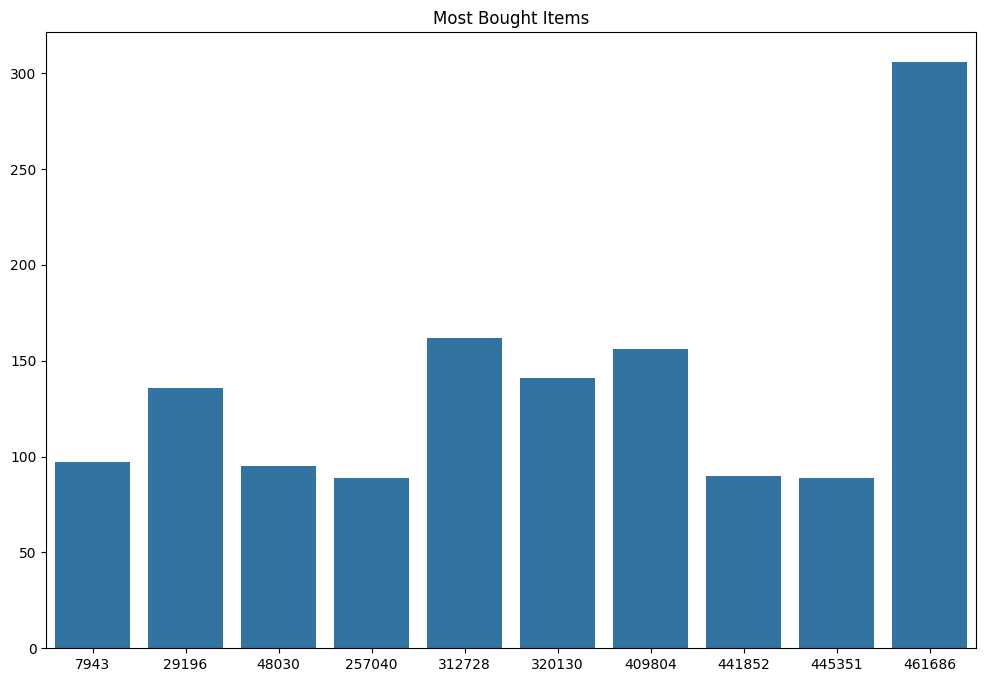

In [ ]:
bar_plot(bought_items_list,bought_frequency_list,"Most Bought Items")

In [ ]:
# Counting the most added to cart items 
most_popular_cart_items = Counter(grouped_df.row(2)[1]).most_common()
most_popular_cart_items=most_popular_cart_items[:10]
most_popular_cart_items

[(187946, 3410),
 (461686, 2539),
 (5411, 2325),
 (370653, 1854),
 (219512, 1740),
 (298009, 1642),
 (96924, 1633),
 (309778, 1565),
 (257040, 1531),
 (384302, 1528)]

In [ ]:
# Adding id's of 10 most add to cart item to list for plotting 
cart_items_list = list_comprehension(most_popular_cart_items, "items")
cart_items_list

[187946, 461686, 5411, 370653, 219512, 298009, 96924, 309778, 257040, 384302]

In [ ]:
# Adding frequency of 10 most add to cart items to list for plotting 
cart_frequency_list = list_comprehension(most_popular_cart_items, "frequency")
cart_frequency_list

[3410, 2539, 2325, 1854, 1740, 1642, 1633, 1565, 1531, 1528]

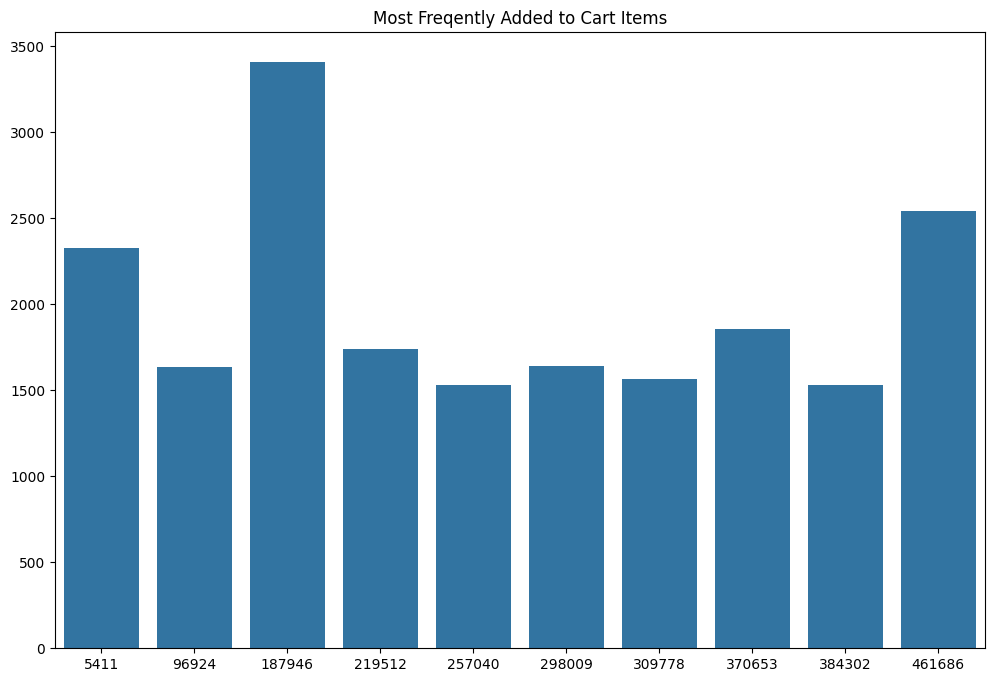

In [ ]:
bar_plot(cart_items_list,cart_frequency_list,"Most Freqently Added to Cart Items")

In [ ]:
most_viewed_items = Counter(grouped_df.row(1)[1]).most_common()
most_viewed_items = most_viewed_items[:10]
most_viewed_items

[(461686, 133),
 (119736, 97),
 (213834, 92),
 (7943, 46),
 (312728, 46),
 (445351, 45),
 (48030, 41),
 (420960, 38),
 (248455, 38),
 (17478, 37)]

In [ ]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_items_list = list_comprehension(most_viewed_items, "items")
viewed_items_list

[461686, 119736, 213834, 7943, 312728, 445351, 48030, 420960, 248455, 17478]

In [ ]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_frequency_list = list_comprehension(most_viewed_items, "frequency")
viewed_frequency_list

[133, 97, 92, 46, 46, 45, 41, 38, 38, 37]

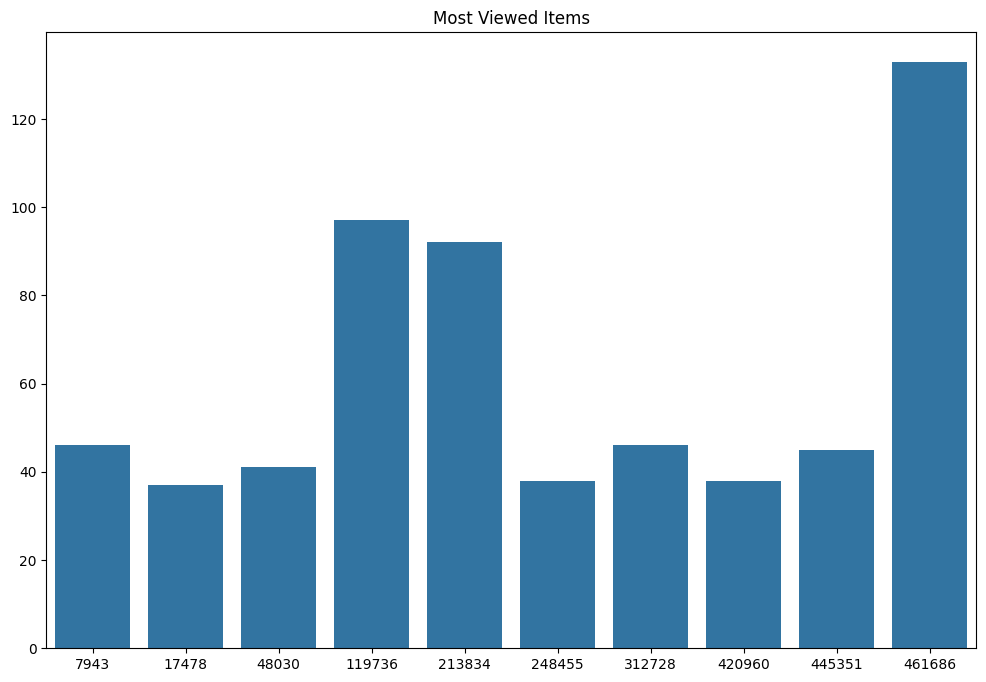

In [ ]:
bar_plot(viewed_items_list,viewed_frequency_list,"Most Viewed Items")

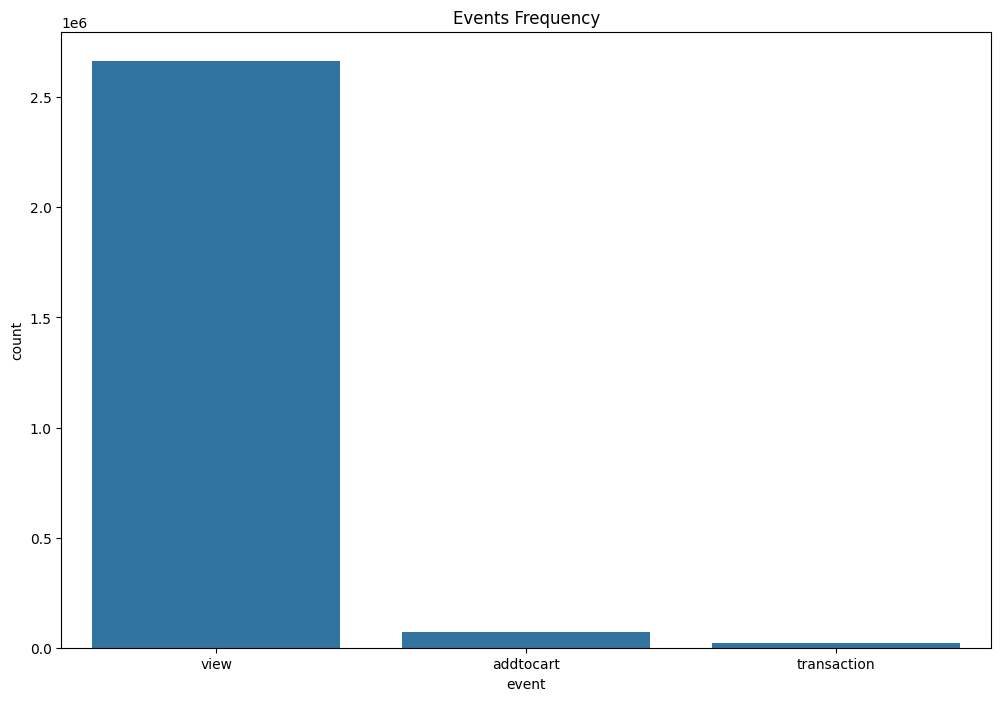

In [ ]:
bar_plot(df_count['event'],df_count['count'],"Events Frequency")

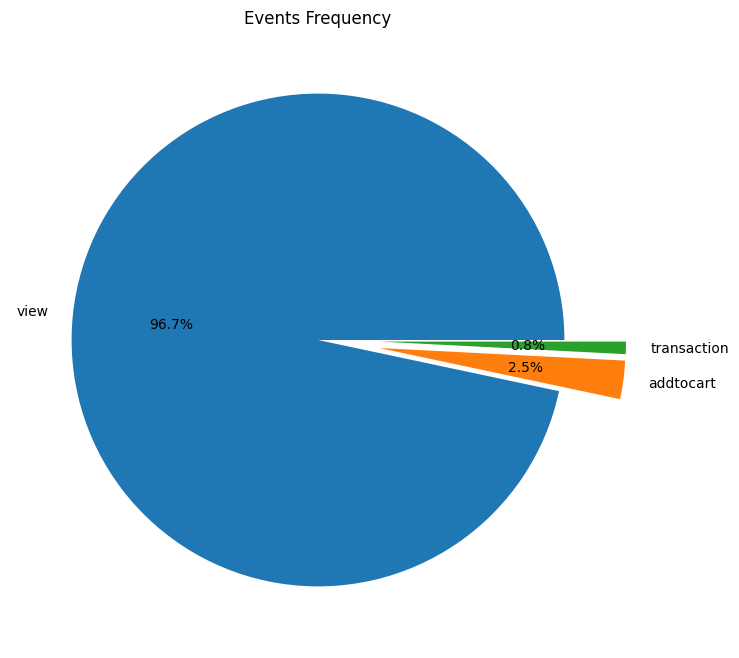

In [ ]:
labels = df_count.select(pl.col('event')).to_series().to_list()
pie_chart(df_count['count'], labels, "Events Frequency")

In [ ]:
purchase_df = event_df.filter(pl.col('event') == 'transaction')
purchase_df.tail()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1438377176570,1050575,"""transaction""",31640,"""8354"""
1438379878779,861299,"""transaction""",456602,"""3643"""
1438357730123,855941,"""transaction""",235771,"""4385"""
1438355560300,548772,"""transaction""",29167,"""13872"""
1438358989163,1051054,"""transaction""",312728,"""17579"""
